## Logistic Regression

Also known as Logit Regression, it is often used to estimate probabilty of a clssification for an instance belong to. Instead of outputing a value like linear regression, it output the logistic of the result. (logistic == logit).

In this case a sigmoid function. 


$
\delta(t) =  \frac{1}{1 + e^-t}
$


### Cost Function
$
c(\theta) = -log(p), \text{if y = 1}
$

$
c(\theta) = -log(1 - p), \text{if y = 0}
$

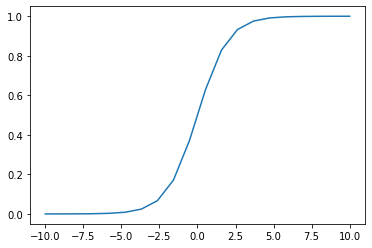

In [15]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-10, 10, 20)
y = sigmoid(x)

plt.plot(x, y)

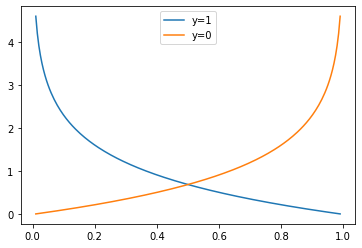

In [29]:
# plotting the cost function intuition, note that basically we want to y approach infinity for undesired result. (ie. for class y = 1, small value if probability close to 1, but approches inifity when close to 0)

x = np.linspace(1e-2, 1 - 1e-2, 200)
plt.plot(x, -np.log(x), label='y=1')
plt.plot(x, -np.log(1 - x), label='y=0')
plt.legend()

## Logistic Regression Cost function (log loss) 

The log loss for the whole dateset can therefore be treated as

$
J(\theta) = \frac{-1}{m}\sum{i=1}^m(y\times log(p_i) + (1-y)\times log(1-p_i))
$

Note that when p is positive, 0 will cancel out the ones and vise versa. Where p is the sigmoid of the linear function. (minus sign is moved to the front)

$
\Delta_J(\theta) = \frac{1}{m}\sum{i}^m(sigmoid(theta.dot(X)) - y).dot(X)
$

Detailed Derivation:
https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression

### Regularisation
Similarly logistic regression can also be regularised with l1 and l2 norms.

In [35]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

X = iris['data'][:, 3:] # Petal Width
y = (iris["target"] == 2).astype(np.int)

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Decision Boundary')

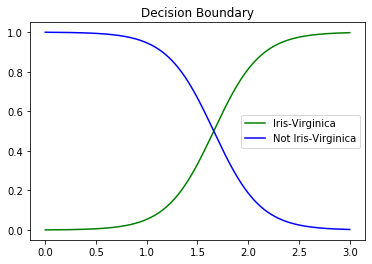

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b-', label = 'Not Iris-Virginica')
plt.legend()
plt.title("Decision Boundary")